To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Longest Path Problem

In this tutorial we will solve longest path problem using the Python library "NetworkX". 

First, let's start by importing the libraries.

In [2]:
import numpy as np
import networkx as nx

# Problem 03

A project manager wants to estimate the duration of a project based on expected activity durations. For this purpose, draw the network diagram representing the problem, where activities are shown on arcs.

| Activity | Predecessor | Expected duration |
| :-----: | :--: | :----: |
| A | - | 5 |
| B | - | 3 |
| C | A,B | 4 |
| D | C | 6 |
| E | A | 4 |
| F | D,E | 5 |


The Python library "NetworkX" supports directed graphs with self loops through the class DiGraph.

In [3]:
G1 = nx.DiGraph()
G1.add_nodes_from([
    ("Start", {"color": "black"}),
    ("A-E", {"color": "black"}),
    ("AB-C", {"color": "black"}),
    ("C-D", {"color": "black"}),
    ("DE-F", {"color": "black"}),
    ("End", {"color": "black"}),
])

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [4]:
nodepos = {
    "Start":np.array([0.0,0.0]),
    "A-E":np.array([1.0,1.0]),
    "AB-C":np.array([2.0,0.0]),
    "C-D":np.array([3.0,0.0]),
    "DE-F":np.array([4.0,0.0]),
    "End":np.array([5.0,0.0])
}

{('Start', 'A-E'): Text(0.5, 0.5, '5'),
 ('Start', 'AB-C'): Text(1.0, 0.0, '3'),
 ('A-E', 'DE-F'): Text(2.5, 0.5, '4'),
 ('A-E', 'AB-C'): Text(1.5, 0.5, '0'),
 ('AB-C', 'C-D'): Text(2.5, 0.0, '4'),
 ('C-D', 'DE-F'): Text(3.5, 0.0, '6'),
 ('DE-F', 'End'): Text(4.5, 0.0, '5')}

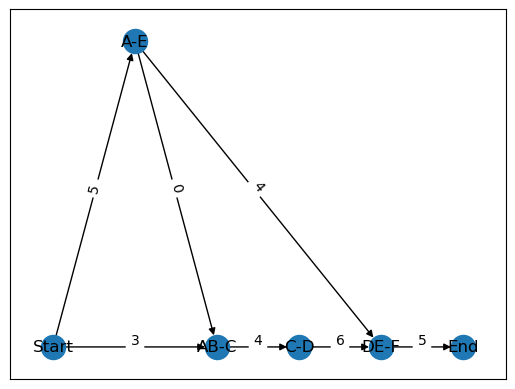

In [5]:
elist = [("Start", "A-E"),
         ("Start", "AB-C"),
         ("AB-C", "C-D"),
         ("C-D", "DE-F"),
         ("A-E", "DE-F"),
         ("DE-F", "End"),
         ("A-E", "AB-C")]
G1.add_edges_from(elist)
eattrs = {("Start", "A-E"): {"weight": 5},
         ("Start", "AB-C"): {"weight": 3},
         ("AB-C", "C-D"): {"weight": 4},
         ("C-D", "DE-F"): {"weight": 6},
         ("A-E", "DE-F"): {"weight": 4},
         ("DE-F", "End"): {"weight": 5},
         ("A-E", "AB-C"): {"weight": 0}}
nx.set_edge_attributes(G1, eattrs)
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'weight'), label_pos = 0.5, verticalalignment = 'bottom')

To get information on the graph "G1":

In [6]:
print(G1)

DiGraph with 6 nodes and 7 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [7]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 1)	5
  (0, 2)	3
  (1, 2)	0
  (1, 4)	4
  (2, 3)	4
  (3, 4)	6
  (4, 5)	5


To have the adjacency matrix of the graph "G1" in dense form:

In [8]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[0 5 3 0 0 0]
 [0 0 0 0 4 0]
 [0 0 0 4 0 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 5]
 [0 0 0 0 0 0]]


In [9]:
criticalpath = nx.dag_longest_path(G1, weight = 'weight')
print(criticalpath)

['Start', 'A-E', 'AB-C', 'C-D', 'DE-F', 'End']


In [10]:
projectduration = nx.dag_longest_path_length(G1, weight = 'weight')
print(projectduration)

20
